## Problem Statement:
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car ?<br>
- How well those variables describe the price of a car?<br><br>
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market. 

## Business Objective:
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Importing required libraries and dataset

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Expanding the output display
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 65)

In [3]:
# Importing CarPrice_Assignment.csv
df_car=pd.read_csv('CarPrice_Assignment.csv')

### Checking for uniqueness of CarName

In [4]:
df_car['CompanyName']=df_car.CarName.str.split(' ',expand=True)[0]

In [5]:
df_car.drop('CarName',axis=1,inplace=True)

In [6]:
#converting CarName to lower case
df_car['CompanyName']=df_car['CompanyName'].str.lower()

In [7]:
df_car['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
#function for replacing redundant values
def unique_map(x,y):
    df_car.CompanyName.replace(x,y,inplace=True)
unique_map('maxda','mazda')
unique_map('porcshce','porsche')
unique_map('toyouta','toyota')
unique_map('vokswagen','volkswagen')
unique_map('vw','volkswagen')

In [9]:
df_car['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Checking for duplicates

In [10]:
df_car.loc[df_car.duplicated()]

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName


### Visualize Data

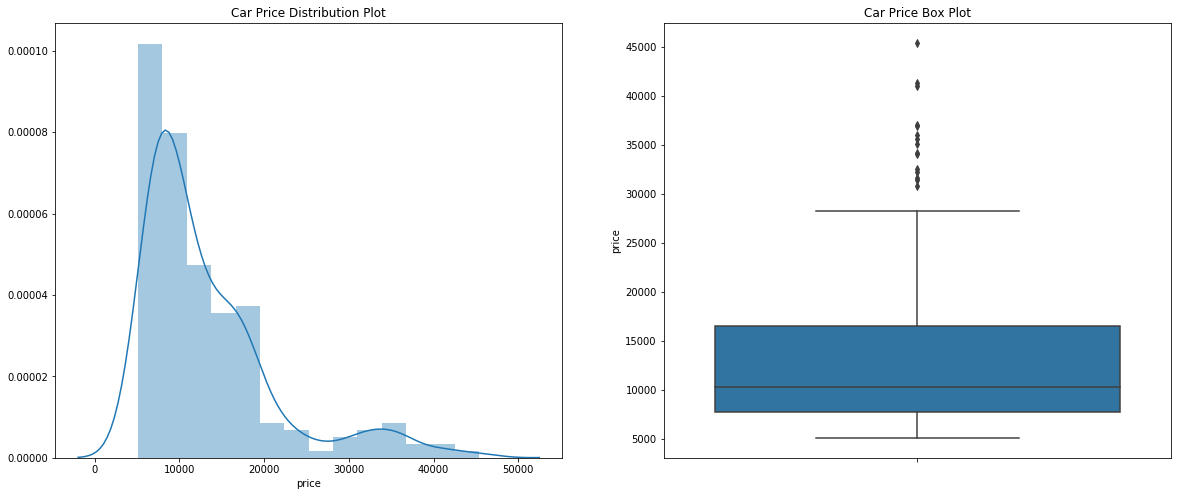

In [11]:
# Car price data distribution plot and boc plot
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df_car.price)

plt.subplot(1,2,2)
plt.title('Car Price Box Plot')
sns.boxplot(y=df_car.price)

plt.show()

In [12]:
print(df_car.price.describe(percentiles = [0.25,0.50,0.75,0.80,0.90,0.99,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
80%      17493.800000
90%      22563.000000
99%      40802.720000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


#### Observation:
Around 80% of cars are below 17.5k dollars.

#### _Frequency plot of categorical variables_

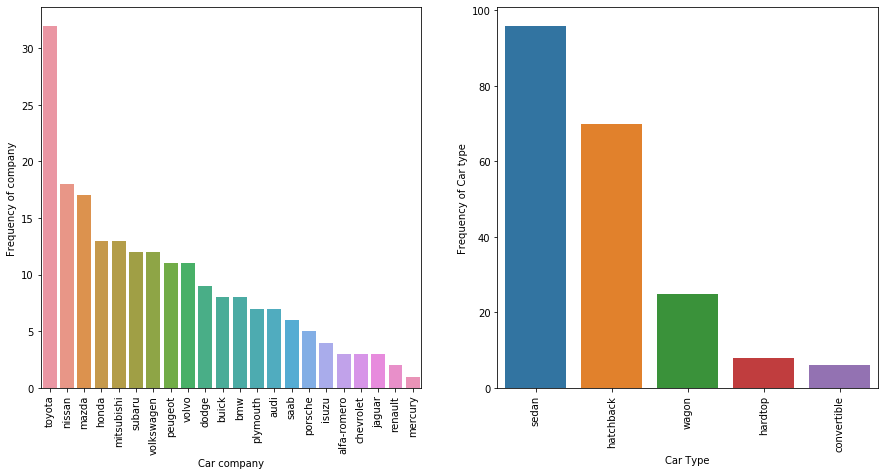

In [13]:
import matplotlib.pyplot as plt
#Frequency distribution of categorical variables like Car company, Cartype

fig, (ax1,ax2)=plt.subplots(1,2)
sns.barplot(df_car.CompanyName.value_counts().index,df_car.CompanyName.value_counts(), ax=ax1)
ax1.set(xlabel = 'Car company', ylabel='Frequency of company')

ax2 = sns.barplot(df_car.carbody.value_counts().index, df_car.carbody.value_counts(), ax=ax2)

ax2.set(xlabel = 'Car Type', ylabel='Frequency of Car type')
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)
fig.set_size_inches(15,7)
plt.show()

#### Observation:
Toyota is the most selling car among all companies while in cartype sedan is the most selling ones.

In [14]:
#Frequency distribution of categorical variables like Fuel Type, Aspiration, cylindernumber, Door number, Engine location, Drive wheel, Engine type
def bar(var):
    plt.figure(figsize=(9,5))
    ax1=sns.barplot(df_car[var].value_counts().index,df_car[var].value_counts())
    ax1.set(xlabel = var, ylabel='Frequency of '+var)
    ax1.tick_params(axis='x', rotation=90)

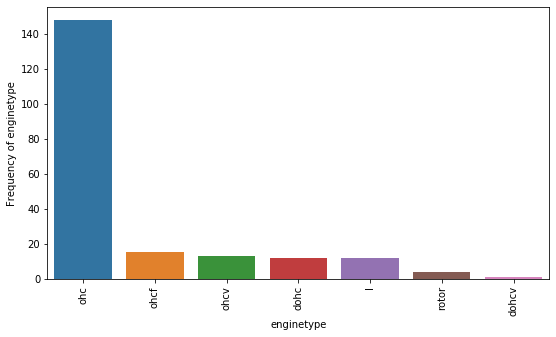

In [15]:
bar('enginetype')

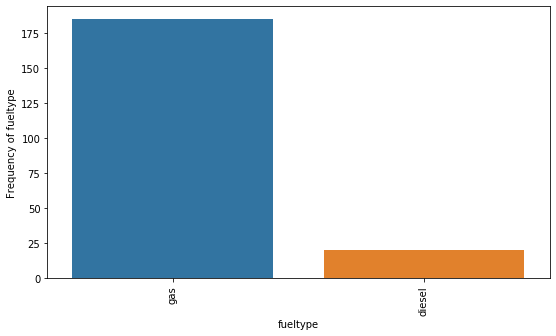

In [16]:
bar('fueltype')

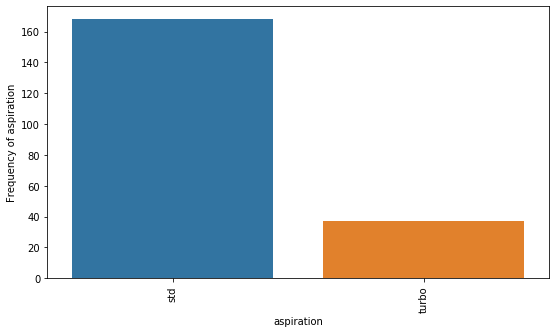

In [17]:
bar('aspiration')

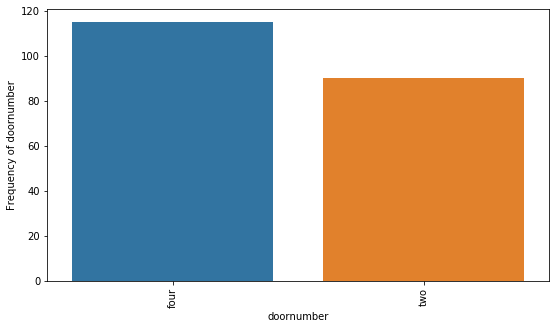

In [18]:
bar('doornumber')

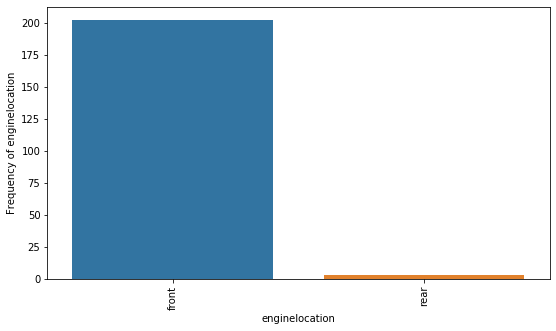

In [19]:
bar('enginelocation')

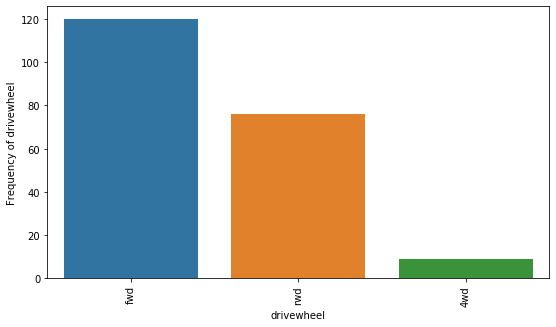

In [20]:
bar('drivewheel')

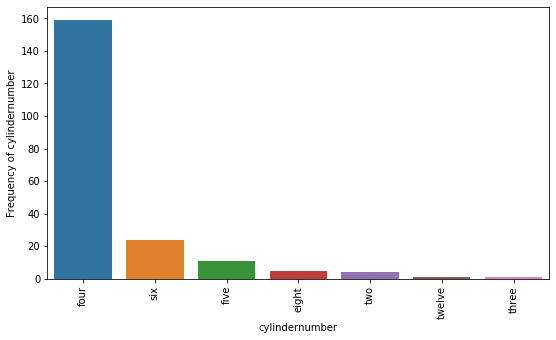

In [21]:
bar('cylindernumber')

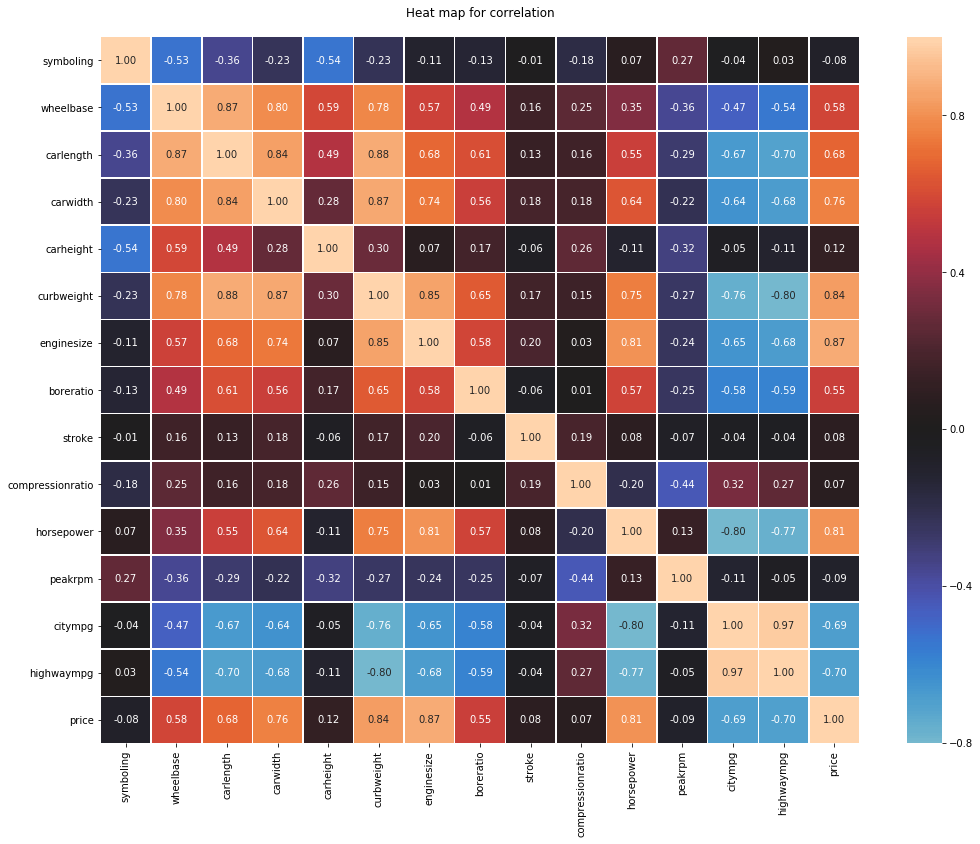

In [22]:
#Heat Map for checking correlation among variables
varlist=['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
a=pd.DataFrame(df_car.loc[:,varlist])
plt.figure(figsize=(17,13))
plt.title('Heat map for correlation', pad=20)
ax=sns.heatmap(a.corr(), linewidths=.5, center=0, annot=True, fmt='.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Observation:

- curbweight, enginesize, carlength, carwidth are among the variables which are creating maximum variance in price. But these variables are highly correlated too among themselves.
- We need to pick either one of them and then proceed picking other features based on the one chosen.

### _Visualizing continuous variables_

In [23]:
li=['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','price']

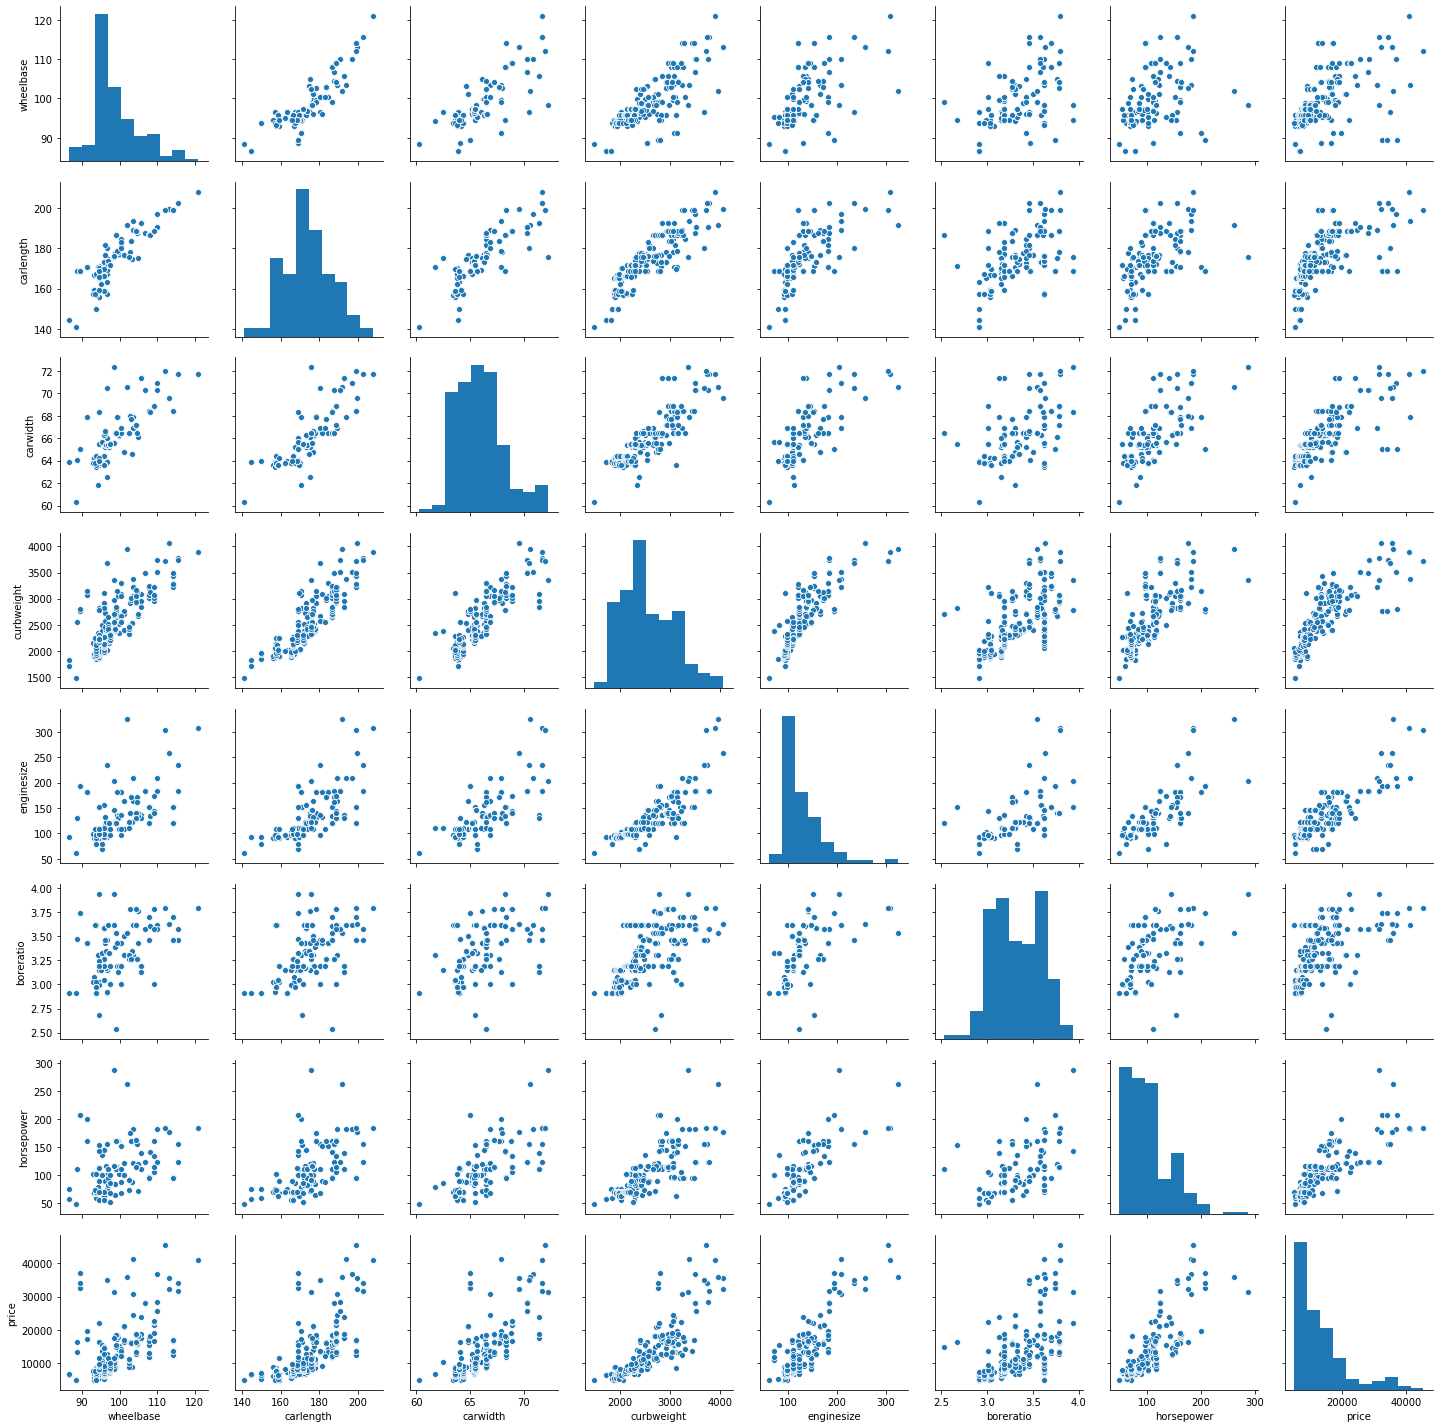

In [24]:
#Pairplot for continuous variables in li list which are relatively positively correlated with price

sns.pairplot(df_car[li])
plt.show()

### _Visualizing categorical variables with price_

In [25]:
#Bivariate Analysis
#Method for boxplot for Categorical variables against price
def box(col):
    plt.figure(figsize=(10, 5))
    g=sns.boxplot(x = col, y = 'price', data = df_car)
    g.set_xticklabels(g.get_xticklabels(),rotation=90)
    plt.show()

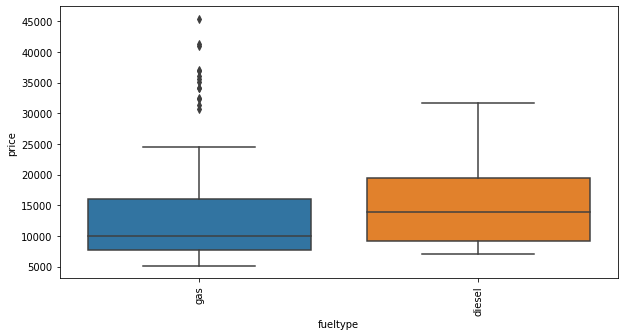

In [26]:
#boxplot for fueltype
box('fueltype')

### Observation:
- Gas cars are having many outliers.

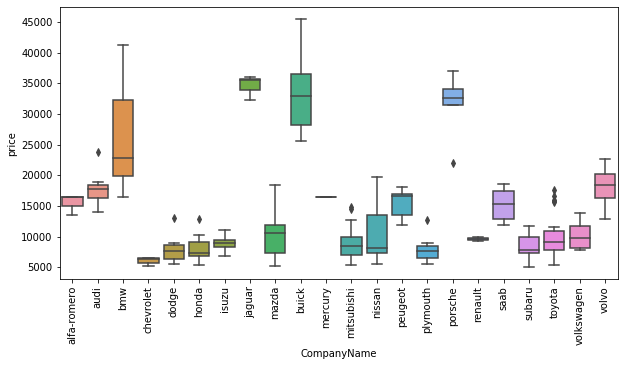

In [27]:
box('CompanyName')

#### Observation:
- BMW has highest Inter quartile range while, buick, jaguar, and porsche are higher priced among others.

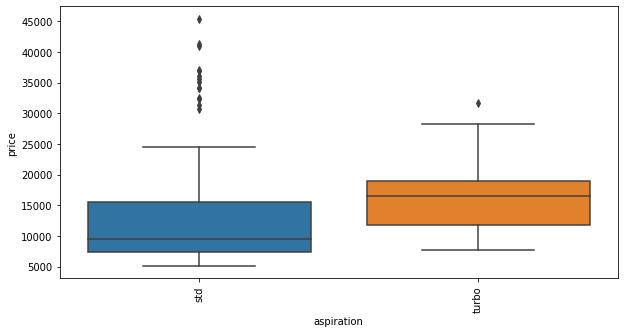

In [28]:
box('aspiration')

#### Observation:
- std has more outliers than turbo

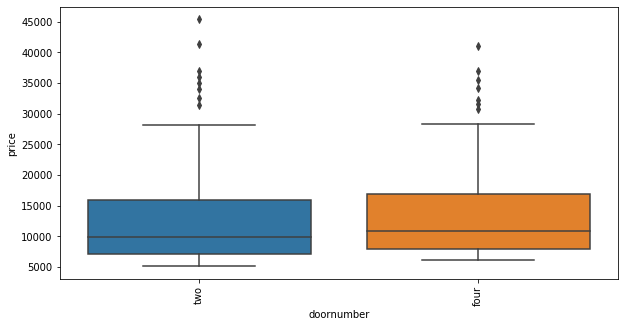

In [29]:
box('doornumber')

#### Observation:
- Not a significant difference in both

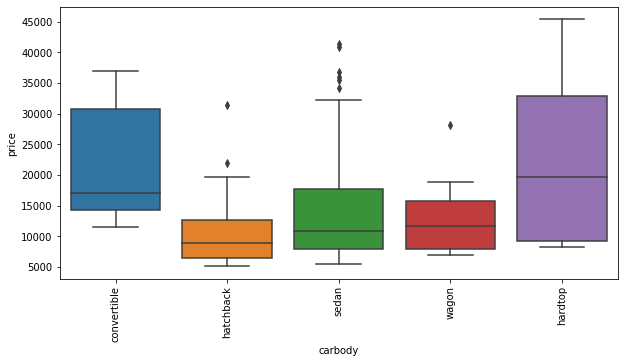

In [30]:
box('carbody')

#### Observation:
- carbody hardtop has highest inter quartile range and the maximum of hardtop is the highest among all.

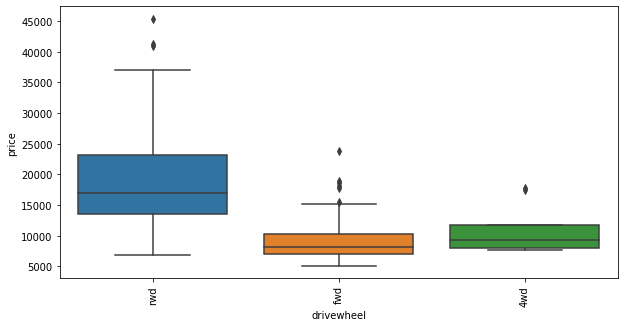

In [31]:
box('drivewheel')

#### Observation:
- drivewheel rwd has the maximum range of prices

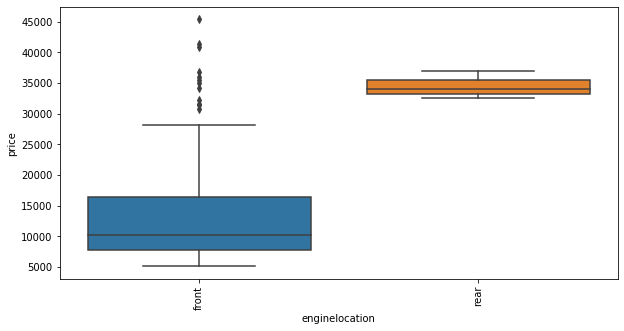

In [32]:
box('enginelocation')

#### Observation:
- enginelocation rear has the maximum range of prices

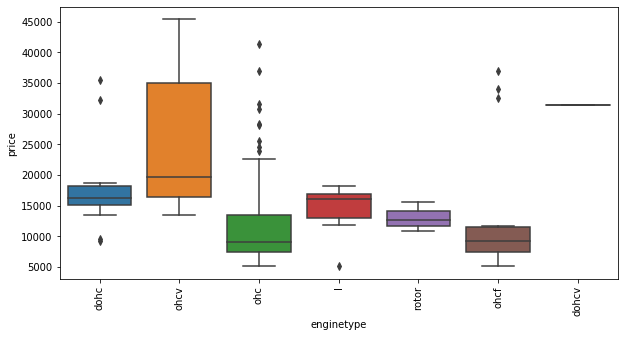

In [33]:
box('enginetype')

#### Observation:
- enginetype ohcv has the maximum range of prices as well as maximum IQR.

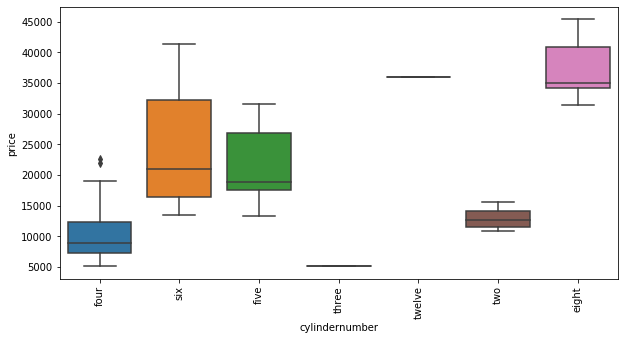

In [34]:
box('cylindernumber')

#### Observation:
- cyindernumber eight has the maximum range of prices while cylindernumber six has maximum IQR.

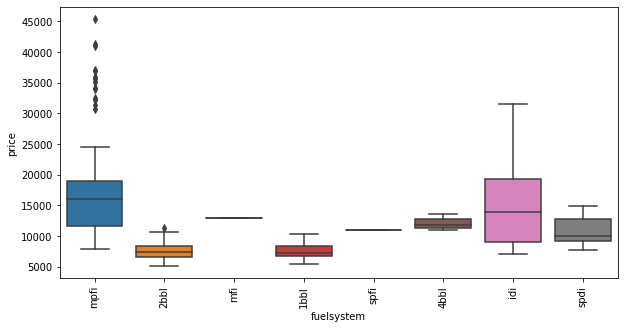

In [35]:
box('fuelsystem')

#### Observation:
- fuelsystem mpfi has many outliers while fuelsystem idi has maximum IQR.

### Derived Metrics:
Average Price

<Figure size 1080x432 with 0 Axes>

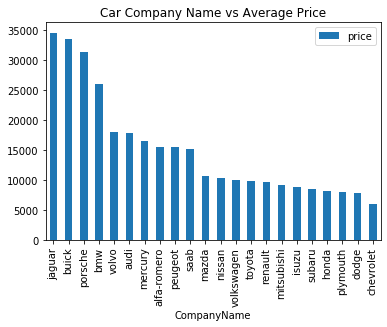

In [36]:
plt.figure(figsize=(15, 6))

df_avg = pd.DataFrame(df_car.groupby(df_car['CompanyName'])['price'].mean().sort_values(ascending = False))
df_avg.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

### Observation: 
Jaguar, Buick and Porsche seems to have highest average price cars.

In [37]:
#function for converting categorical to discrete values
def discrete_map(key):
    di={'two':2,'four':4,'six':6,'five':5,'three':3,'twelve':12,'eight':8}
    return di.get(key,key)

In [38]:
#conversion of cylindernumber, doornumber categorical variable to discrete variable
df_car['cylindernumber']=df_car.cylindernumber.apply(discrete_map)
df_car['doornumber']=df_car.doornumber.apply(discrete_map)

#### _As checked all the variables now have unique values , dataset has no duplicate rows and there are no null values too_

### Dummy Variables

In [39]:
#list of unordered categorical variable
varlist=['CompanyName','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem']

#Get dummies
dummy = pd.get_dummies(df_car[varlist].astype(object),drop_first=True)

# Add the results to the original housing dataframe
df_car = pd.concat([df_car, dummy], axis = 1)

# Drop variables for which we have created the dummies
df_car.drop(varlist, axis = 1, inplace = True)

In [40]:
#dropping car_ID
df_car.drop('car_ID', axis = 1, inplace = True)

## Splitting the dataset into training and test dataset

In [41]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df_car, train_size = 0.7, test_size = 0.3, random_state = 100)

In [42]:
df_train.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'CompanyName_audi', 'CompanyName_bmw',
       'CompanyName_buick', 'CompanyName_chevrolet', 'CompanyName_dodge',
       'CompanyName_honda', 'CompanyName_isuzu', 'CompanyName_jaguar',
       'CompanyName_mazda', 'CompanyName_mercury', 'CompanyName_mitsubishi',
       'CompanyName_nissan', 'CompanyName_peugeot', 'CompanyName_plymouth',
       'CompanyName_porsche', 'CompanyName_renault', 'CompanyName_saab',
       'CompanyName_subaru', 'CompanyName_toyota', 'CompanyName_volkswagen',
       'CompanyName_volvo', 'fueltype_gas', 'aspiration_turbo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
     

## Rescaling the features
#### _Min Max Scaling_

In [43]:
from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

In [44]:
#creating a scaler object one for features and the other for target variable
xscaler = MinMaxScaler()
yscaler = MinMaxScaler()
num_vars = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'CompanyName_audi', 'CompanyName_bmw',
       'CompanyName_buick', 'CompanyName_chevrolet', 'CompanyName_dodge',
       'CompanyName_honda', 'CompanyName_isuzu', 'CompanyName_jaguar',
       'CompanyName_mazda', 'CompanyName_mercury', 'CompanyName_mitsubishi',
       'CompanyName_nissan', 'CompanyName_peugeot', 'CompanyName_plymouth',
       'CompanyName_porsche', 'CompanyName_renault', 'CompanyName_saab',
       'CompanyName_subaru', 'CompanyName_toyota', 'CompanyName_volkswagen',
       'CompanyName_volvo', 'fueltype_gas', 'aspiration_turbo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi']
df_train[num_vars] = xscaler.fit_transform(df_train[num_vars])
df_train['price'] =yscaler.fit_transform(df_train[['price']])

In [45]:
#dividing into X and y sets for model building
y_train = df_train.pop('price')
X_train = df_train

## Building our model

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)
#### RFE: Recursive Feature Elimination

In [46]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [47]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 43),
 ('doornumber', False, 41),
 ('wheelbase', False, 9),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 23),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 6),
 ('horsepower', False, 18),
 ('peakrpm', False, 4),
 ('citympg', False, 11),
 ('highwaympg', False, 31),
 ('CompanyName_audi', False, 33),
 ('CompanyName_bmw', True, 1),
 ('CompanyName_buick', False, 39),
 ('CompanyName_chevrolet', False, 27),
 ('CompanyName_dodge', False, 24),
 ('CompanyName_honda', False, 28),
 ('CompanyName_isuzu', False, 35),
 ('CompanyName_jaguar', False, 29),
 ('CompanyName_mazda', False, 37),
 ('CompanyName_mercury', False, 48),
 ('CompanyName_mitsubishi', False, 21),
 ('CompanyName_nissan', False, 34),
 ('CompanyName_peugeot', False, 2),
 ('CompanyName_plymouth', False, 25),
 ('CompanyName_porsche', True, 1),
 ('CompanyName_renault', False, 30),
 (

In [49]:
#We have our top 10 significant variables in col
col=X_train.columns[rfe.support_]
col

Index(['carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'CompanyName_bmw', 'CompanyName_porsche',
       'enginelocation_rear'],
      dtype='object')

In [50]:
#X_train.columns[~rfe.support_]

### Building model using statsmodel, for the detailed statistics

#### _Model 1_

#### _A method for creating a linear regression model._

In [51]:
import statsmodels.api as sm 
def model(col):
    # Creating X_train dataframe with RFE selected variables
    X_train_rfe = X_train[col]

    # Adding a constant variable  
    X_train_rfe = sm.add_constant(X_train_rfe)

    # Running the linear model
    lm = sm.OLS(y_train,X_train_rfe).fit()   

    #printing the summary
    print(lm.summary())
    return lm,X_train_rfe

#### _Method for checking VIF._

In [52]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_check(col):
    vif = pd.DataFrame()
    X = X_train[col]
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [53]:
# Calling method for creation of linear model
lm,X_train_rfe=model(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     143.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           6.56e-66
Time:                        16:40:54   Log-Likelihood:                 194.04
No. Observations:                 143   AIC:                            -366.1
Df Residuals:                     132   BIC:                            -333.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1400    

In [54]:
#Calling method for VIF check
vif_check(col)

,Features,VIF
2,curbweight,56.82
0,carlength,55.98
1,carwidth,46.28
4,enginesize,33.54
3,cylindernumber,17.16
5,boreratio,12.35
6,stroke,7.40
8,CompanyName_porsche,2.25
9,enginelocation_rear,1.72
7,CompanyName_bmw,1.20


In [55]:
'''From data visualization, it has been observed that curbweight and engine size are the variables which are responsible for 
most of the variation in price and also these two are highly correlated to each other, so i will remove engine size''' 
col=col.drop(labels='enginesize')

#### _Model 2_

In [56]:
lm,X_train_rfe=model(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     127.2
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           7.33e-61
Time:                        16:40:54   Log-Likelihood:                 178.70
No. Observations:                 143   AIC:                            -337.4
Df Residuals:                     133   BIC:                            -307.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1679    

In [57]:
vif_check(col)

,Features,VIF
0,carlength,50.75
1,carwidth,45.93
2,curbweight,29.01
4,boreratio,12.08
3,cylindernumber,8.50
5,stroke,7.38
7,CompanyName_porsche,2.24
8,enginelocation_rear,1.69
6,CompanyName_bmw,1.18


In [58]:
#here stroke is coming out to be insignificant so removing it
col=col.drop(labels='stroke')

#### _Model 3_

In [59]:
lm,X_train_rfe=model(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     144.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.90e-62
Time:                        16:40:54   Log-Likelihood:                 178.70
No. Observations:                 143   AIC:                            -339.4
Df Residuals:                     134   BIC:                            -312.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1670    

In [60]:
vif_check(col)

,Features,VIF
0,carlength,48.82
1,carwidth,42.32
2,curbweight,26.63
4,boreratio,12.03
3,cylindernumber,8.09
6,CompanyName_porsche,2.20
7,enginelocation_rear,1.68
5,CompanyName_bmw,1.17


In [61]:
#boreratio is insignificant so removing it as well
col=col.drop(labels='boreratio')

#### _Model 4_

In [62]:
lm,X_train_rfe=model(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     165.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.05e-63
Time:                        16:40:55   Log-Likelihood:                 178.55
No. Observations:                 143   AIC:                            -341.1
Df Residuals:                     135   BIC:                            -317.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1729    

In [63]:
vif_check(col)

,Features,VIF
1,carwidth,42.17
0,carlength,39.33
2,curbweight,26.63
3,cylindernumber,8.02
5,CompanyName_porsche,1.96
6,enginelocation_rear,1.68
4,CompanyName_bmw,1.17


In [64]:
#CompanyName_porsche is insignificant, hence removing it
col=col.drop(labels='CompanyName_porsche')

#### _Model 5_

In [65]:
lm,X_train_rfe=model(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     193.4
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.08e-64
Time:                        16:40:55   Log-Likelihood:                 178.15
No. Observations:                 143   AIC:                            -342.3
Df Residuals:                     136   BIC:                            -321.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1734    

In [66]:
vif_check(col)

,Features,VIF
1,carwidth,35.38
0,carlength,32.18
2,curbweight,26.55
3,cylindernumber,8.01
4,CompanyName_bmw,1.17
5,enginelocation_rear,1.04


In [67]:
#carwidth is highly correlated to carlength and curbweight so removing it
col=col.drop(labels='carwidth')

#### _Model 6_

In [68]:
lm,X_train_rfe=model(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     171.8
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.40e-57
Time:                        16:40:55   Log-Likelihood:                 158.79
No. Observations:                 143   AIC:                            -305.6
Df Residuals:                     137   BIC:                            -287.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1416    

In [69]:
vif_check(col)

,Features,VIF
1,curbweight,23.78
0,carlength,20.54
2,cylindernumber,7.10
3,CompanyName_bmw,1.09
4,enginelocation_rear,1.03


In [70]:
#carlength is insignificant as shown in summary, greater than 0.05, so removing it
col=col.drop(labels='carlength')

#### _Model 7_

In [71]:
lm,X_train_rfe=model(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     210.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.27e-57
Time:                        16:40:56   Log-Likelihood:                 156.95
No. Observations:                 143   AIC:                            -303.9
Df Residuals:                     138   BIC:                            -289.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1710    

In [72]:
vif_check(col)

,Features,VIF
1,cylindernumber,6.99
0,curbweight,6.83
2,CompanyName_bmw,1.09
3,enginelocation_rear,1.02


In [73]:
#cylindernumber has high correlation so removing it
col=col.drop(labels='cylindernumber')

#### _Model 8_

In [74]:
lm,X_train_rfe=model(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     239.8
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           9.76e-55
Time:                        16:40:56   Log-Likelihood:                 147.11
No. Observations:                 143   AIC:                            -286.2
Df Residuals:                     139   BIC:                            -274.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1347    

In [75]:
vif_check(col)

,Features,VIF
0,curbweight,1.08
1,CompanyName_bmw,1.07
2,enginelocation_rear,1.01


In [76]:
"""As I have removed all the insignificant and highly correlated features, as i have visualized each feature above and with the
help of heat map, i will be adding relevant features which might add to the variation of given model which are significant and 
uncorrelated too"""
#starting with CompanyName_buick
li=col.tolist()
li.append('CompanyName_buick')

In [77]:
print(li)

['curbweight', 'CompanyName_bmw', 'enginelocation_rear', 'CompanyName_buick']


#### _Model 9_

In [78]:
lm,X_train_rfe=model(li)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     204.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.87e-57
Time:                        16:40:57   Log-Likelihood:                 155.36
No. Observations:                 143   AIC:                            -300.7
Df Residuals:                     138   BIC:                            -285.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1156    

In [79]:
vif_check(li)

,Features,VIF
0,curbweight,1.24
3,CompanyName_buick,1.15
1,CompanyName_bmw,1.08
2,enginelocation_rear,1.01


In [80]:
#as the adjusted R-squareed increases keeping VIF low and p-values in significant range 
#adding CompanyName_jaguar
li.append('CompanyName_jaguar')

#### _Model 10_

In [81]:
lm,X_train_rfe=model(li)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     189.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.16e-59
Time:                        16:40:57   Log-Likelihood:                 164.74
No. Observations:                 143   AIC:                            -317.5
Df Residuals:                     137   BIC:                            -299.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0900    

In [82]:
vif_check(li)

,Features,VIF
0,curbweight,1.41
3,CompanyName_buick,1.17
4,CompanyName_jaguar,1.14
1,CompanyName_bmw,1.09
2,enginelocation_rear,1.01


In [83]:
#again the adjusted R-squareed increases keeping VIF low and p-values in significant range 
#adding carbody_wagon
li.append('carbody_wagon')

#### _Model 11_

In [84]:
lm,X_train_rfe=model(li)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     180.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.82e-62
Time:                        16:40:57   Log-Likelihood:                 173.59
No. Observations:                 143   AIC:                            -333.2
Df Residuals:                     136   BIC:                            -312.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0918    

In [85]:
vif_check(li)

,Features,VIF
0,curbweight,1.71
5,carbody_wagon,1.22
3,CompanyName_buick,1.18
4,CompanyName_jaguar,1.17
1,CompanyName_bmw,1.11
2,enginelocation_rear,1.01


In [86]:
#similarly adding peakrpm and will check the model
li.append('peakrpm')

#### _Model 12_

In [87]:
lm,X_train_rfe=model(li)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     177.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           7.64e-65
Time:                        16:40:58   Log-Likelihood:                 183.01
No. Observations:                 143   AIC:                            -350.0
Df Residuals:                     135   BIC:                            -326.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1582    

In [88]:
vif_check(li)

,Features,VIF
0,curbweight,4.13
6,peakrpm,2.76
3,CompanyName_buick,1.36
4,CompanyName_jaguar,1.28
5,carbody_wagon,1.23
1,CompanyName_bmw,1.14
2,enginelocation_rear,1.02


### _Now we are done adding features, have attained training model with adjusted R-squared as 89.7%_

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [89]:
#predict target variable in train dataset
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

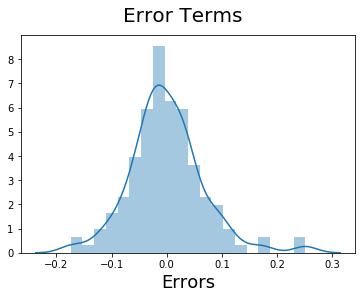

In [90]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### _Error terms are normalized only as shown in histogram_

## Making Predictions

#### _Applying scaling on the test sets_

In [91]:
#fit and transform the dataset
df_test.loc[:,num_vars]=xscaler.transform(df_test[num_vars])
#df_test.iloc[:,:] = scaler.transform(df_test)
#df_train.head()

In [92]:
#Dividing into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [93]:
#dropping const from model
varlist=X_train_rfe.drop('const',axis=1)

In [94]:
# Now let's use our model to make predictions.
X_test = X_test[varlist.columns]

# Adding a constant variable 
X_test = sm.add_constant(X_test)

In [95]:
# Making predictions
y_test_pred = lm.predict(X_test)

## Model Evaluation

In [96]:
#applying inverse transform on y_test_pred
y_test_pred=pd.Series(yscaler.inverse_transform(y_test_pred.values.reshape(-1,1)).reshape(1,-1)[0])
#y_test_pred

Text(0, 0.5, 'y_test_pred')

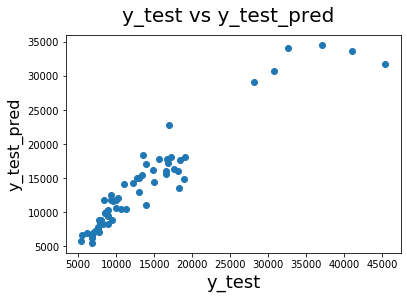

In [97]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'Price')

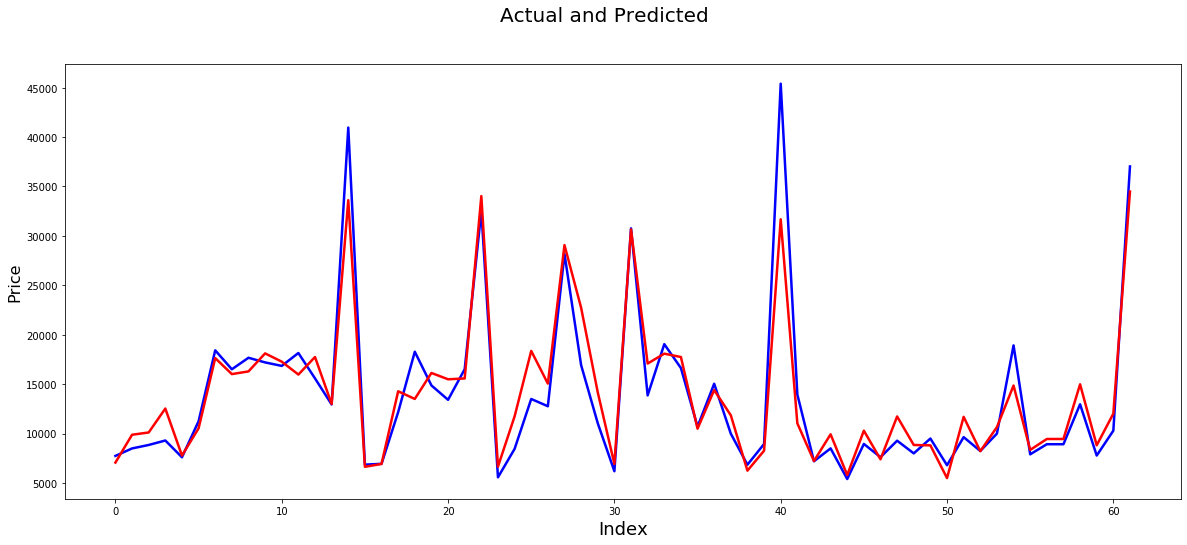

In [98]:
#Actual vs Predicted
c = [i for i in range(len(df_test))]
fig = plt.figure(figsize=(20,8))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)                               # Y-label

Text(0, 0.5, 'y_test-y_test_pred')

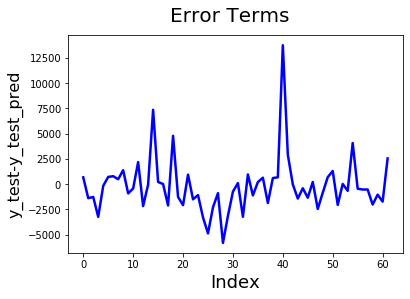

In [99]:
# Error terms
c = [i for i in range(len(df_test))]
fig = plt.figure()
plt.plot(c,y_test.values-y_test_pred.values, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('y_test-y_test_pred', fontsize=16)         # Y-label

In [100]:
#importing libraries for mean_squared_error and R-squared
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [101]:
#Mean Squared Error for the model
mean_squared_error(y_test, y_test_pred)

7542815.472566972

In [102]:
#R-squared for test dataset
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.8922902642633578

### _R-squared for test model comes out to be 89.2%_

## Approach for building model:
1. After all Data preprocessing required, data is being split into train and test data.
2. Dataset is scaled using MinMaxScaler
3. A linear regression model is being created using LinearRegression 
4. Top 10 significant features are selected using Recursive Feature Elimination
5. Among those features which are either highly correlated or insignificant are removed.
6. Based on my analysis from the heat map correlation and graphs, i keep on adding significant variables for increasing the efficiency of models.

In [104]:
lm.params

const                 -0.158204
curbweight             0.745714
CompanyName_bmw        0.289284
enginelocation_rear    0.491340
CompanyName_buick      0.227989
CompanyName_jaguar     0.199596
carbody_wagon         -0.072953
peakrpm                0.138273
dtype: float64

## Conclusion:
1. The error terms are normalized keeping our assumptions correct.
2. There was a linear relationship (observed from data visualization) between target variables and predictor ones.
3. Assumption of multicollinearity is being checked while building models.
4. There is no pattern observed in error terms.
5. R-squared for test dataset comes out to be 89.2% which implies our model is able to predict 89.2% variance in data.
6. the difference between R-squared of training data and R-squared of test data is 0.5% which is below 5%.
7. The Linear Equation for model comes out to be:<br>
__price =  0.745714\*curbweight + 0.491340\*enginelocation_rear + 0.289284\*CompanyName_bmw + 0.227989\*CompanyName_buick + 0.199596\*CompanyName_jaguar + 0.138273\*peakrpm + -0.072953\*carbody_wagon + (-0.158204)__